In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [5]:
avg_ratings = np.load('average_ratings.npy')
avg_ratings

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

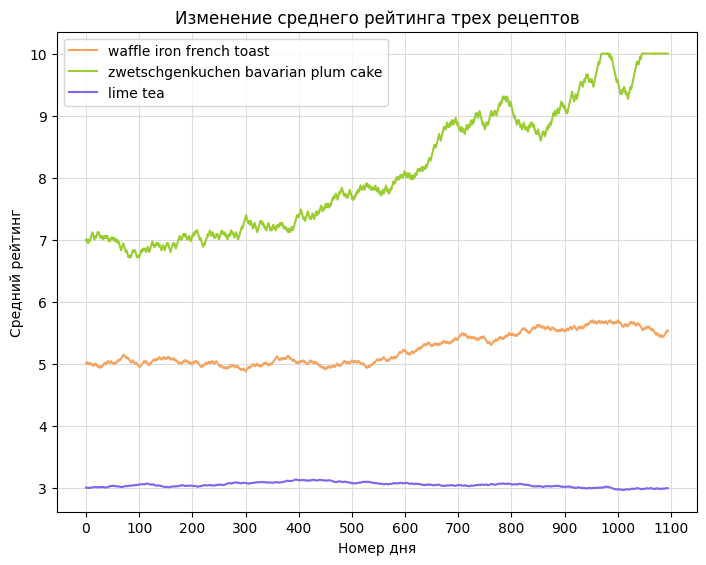

In [72]:
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])

axes.plot(avg_ratings[0], color="sandybrown")
axes.plot(avg_ratings[1], color="yellowgreen")
axes.plot(avg_ratings[2], color="mediumslateblue")

axes.set_xlabel("Номер дня")
axes.set_ylabel("Средний рейтинг")
axes.set_title("Изменение среднего рейтинга трех рецептов")

axes.legend(["waffle iron french toast", "zwetschgenkuchen bavarian plum cake", "lime tea"], loc='upper left')
axes.grid(color="gainsboro")

axes.set_xticks(np.arange(0, 1100 + 1, 100))

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


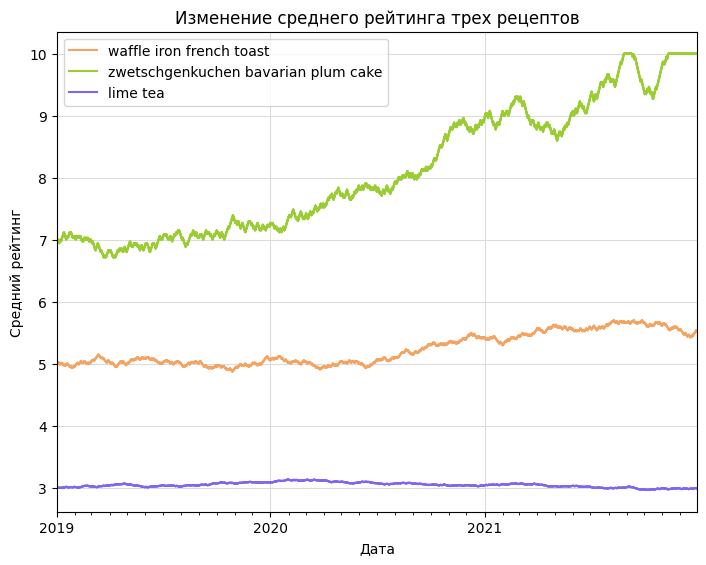

In [35]:
dates = pd.date_range(start='1/1/2019', end='30/12/2021')

axes.plot(dates, avg_ratings[0], color="sandybrown")
axes.plot(dates, avg_ratings[1], color="yellowgreen")
axes.plot(dates, avg_ratings[2], color="mediumslateblue")

axes.set_xlabel("Дата")
axes.set_xlim([dates[0], dates[-1]])

axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_minor_locator(mdates.MonthLocator())

fig

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

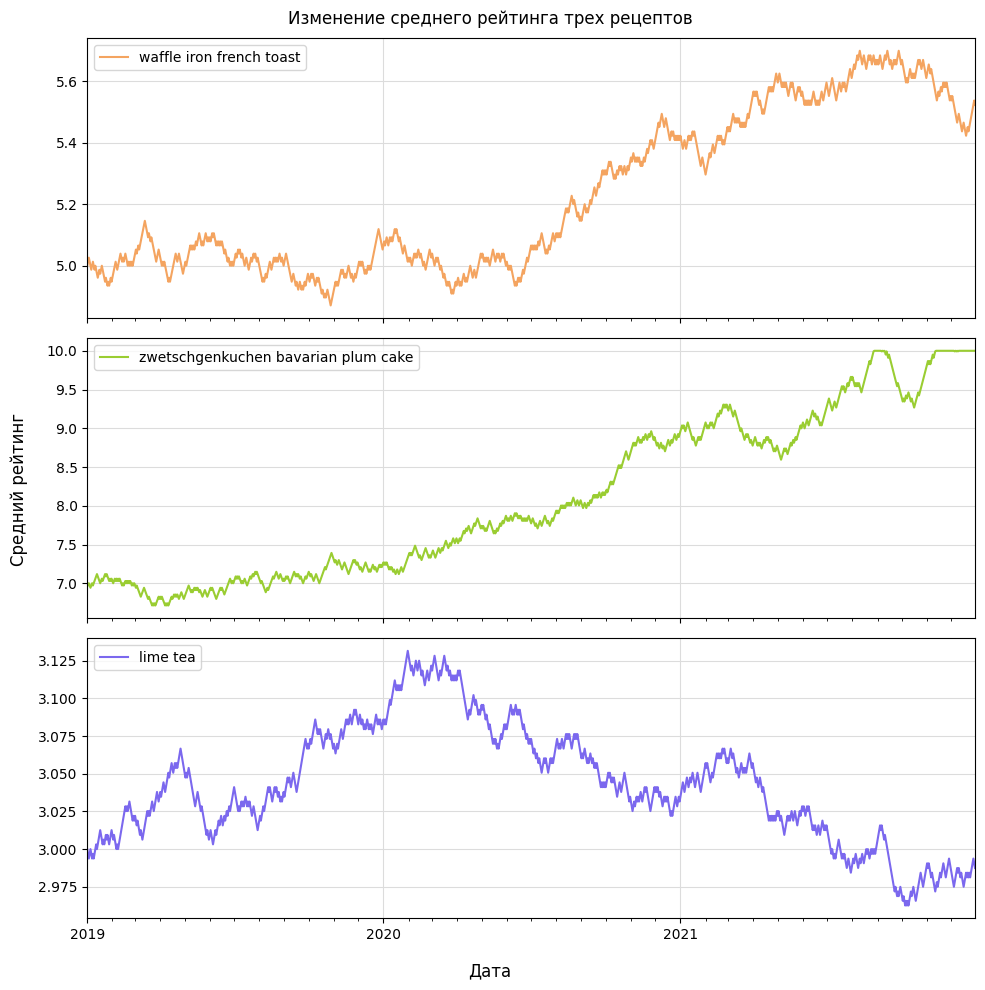

In [57]:
fig_split, axes_split = plt.subplots(nrows=3, ncols=1, figsize = (10, 10), sharex='col')

fig_split.suptitle("Изменение среднего рейтинга трех рецептов")
fig_split.supxlabel("Дата")
fig_split.supylabel("Средний рейтинг")

axes_split[0].plot(dates, avg_ratings[0], color="sandybrown")
axes_split[1].plot(dates, avg_ratings[1], color="yellowgreen")
axes_split[2].plot(dates, avg_ratings[2], color="mediumslateblue")

axes_split[0].set_xlim([dates[0], dates[-1]])
axes_split[1].set_xlim([dates[0], dates[-1]])
axes_split[2].set_xlim([dates[0], dates[-1]])

axes_split[0].grid(color="gainsboro")
axes_split[1].grid(color="gainsboro")
axes_split[2].grid(color="gainsboro")

axes_split[0].xaxis.set_major_locator(mdates.YearLocator())
axes_split[0].xaxis.set_minor_locator(mdates.MonthLocator())
axes_split[1].xaxis.set_major_locator(mdates.YearLocator())
axes_split[1].xaxis.set_minor_locator(mdates.MonthLocator())
axes_split[2].xaxis.set_major_locator(mdates.YearLocator())
axes_split[2].xaxis.set_minor_locator(mdates.MonthLocator())

axes_split[0].legend(["waffle iron french toast"], loc='upper left')
axes_split[1].legend(["zwetschgenkuchen bavarian plum cake"], loc='upper left')
axes_split[2].legend(["lime tea"], loc='upper left')

fig_split.tight_layout()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [73]:
visitors = np.load("visitors.npy")
visitors

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

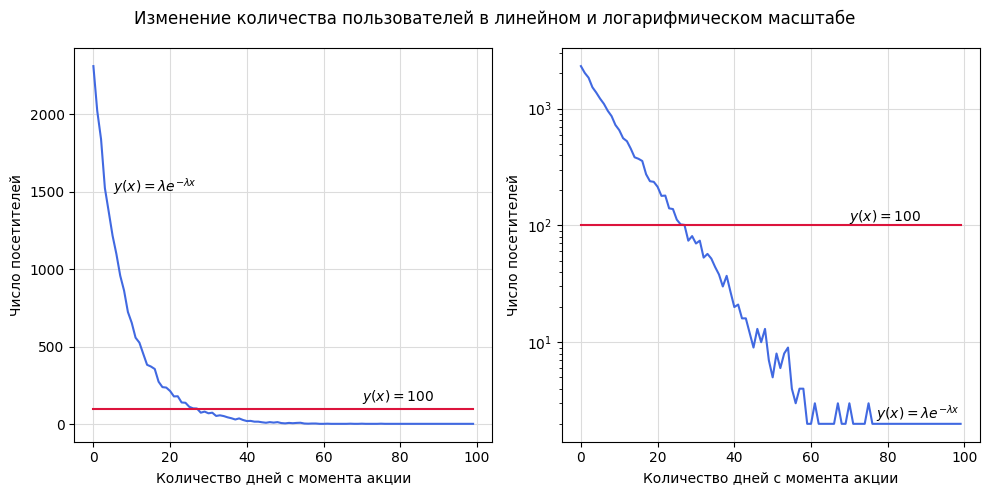

In [109]:
fig_split2, axes_split2 = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))

fig_split2.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")

axes_split2[0].plot(visitors, color="royalblue")
axes_split2[1].plot(visitors, color="royalblue")

axes_split2[1].set_yscale("log")

axes_split2[0].text(5, 1500, "$y(x)=\lambda e^{-\lambda x}$")
axes_split2[1].text(77, 2.2, "$y(x)=\lambda e^{-\lambda x}$")

axes_split2[0].plot([100] * 100, color="crimson")
axes_split2[1].plot([100] * 100, color="crimson")

axes_split2[0].text(70, 150, "$y(x)=100$")
axes_split2[1].text(70, 110, "$y(x)=100$")

axes_split2[0].set_xlabel("Количество дней с момента акции")
axes_split2[1].set_xlabel("Количество дней с момента акции")

axes_split2[0].set_ylabel("Число посетителей")
axes_split2[1].set_ylabel("Число посетителей")

axes_split2[0].grid(color="gainsboro")
axes_split2[1].grid(color="gainsboro")

fig_split2.tight_layout()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [111]:
reviews = pd.read_csv("reviews_sample.csv")
recipes = pd.read_csv("recipes_sample.csv")

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [124]:
short_ = recipes[recipes.minutes < 5]
medium_ = recipes[(recipes.minutes >= 5) & (recipes.minutes < 50)]
long_ = recipes[recipes.minutes >= 50]

In [125]:
groups_ = [short_, medium_, long_]

len_and_avr_steps = [[group.n_steps.mean(), len(group)] for group in groups_]
len_and_avr_steps

[[4.990430622009569, 675],
 [8.581921927361652, 17607],
 [11.917290164603456, 11718]]

In [126]:
data_ = pd.DataFrame(len_and_avr_steps, index=["Короткие", "Средние", "Длинные"], columns=["Среднее кол-во шагов", "Размер группы"])
data_

,Среднее кол-во шагов,Размер группы
Короткие,4.990431,675
Средние,8.581922,17607
Длинные,11.917290,11718


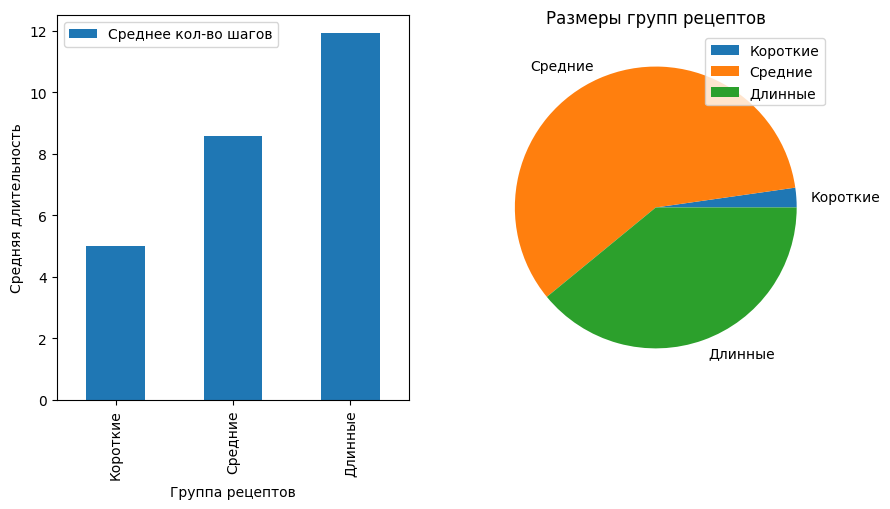

In [142]:
fig_3, axes_3 = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

data_.plot(ax=axes_3[0], y="Среднее кол-во шагов", xlabel = "Группа рецептов", ylabel = "Средняя длительность", kind = 'bar')

data_.plot(ax=axes_3[1], y="Размер группы", title="Размеры групп рецептов", ylabel = "",  kind = 'pie')

axes_3[1].legend(loc="upper right")

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [132]:
reviews_2008 = reviews[reviews.date.str[:4] == '2008']
reviews_2009 = reviews[reviews.date.str[:4] == '2009']

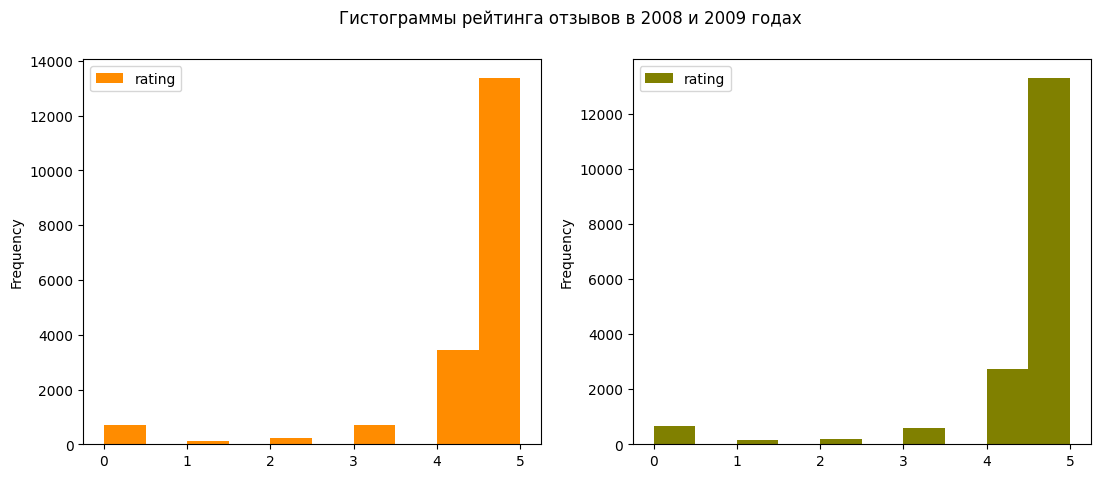

In [140]:
fig_4, axes_4 = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

fig_4.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")

reviews_2008.rating.plot.hist(color="darkorange", ax=axes_4[0])
reviews_2009.rating.plot.hist(color="olive", ax=axes_4[1])

axes_4[0].legend()
axes_4[1].legend()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

In [146]:
def status_(minutes_):
    if minutes_ < 5:
        return "short_"
    elif 5 <= minutes_ < 50:
        return "medium_"
    else:
        return "long_"

In [147]:
recipes['status'] = recipes.minutes.map(status_)
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,status
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long_
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,medium_
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,medium_
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,medium_
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,medium_
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,long_
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,long_
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,long_
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,long_


[Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')]

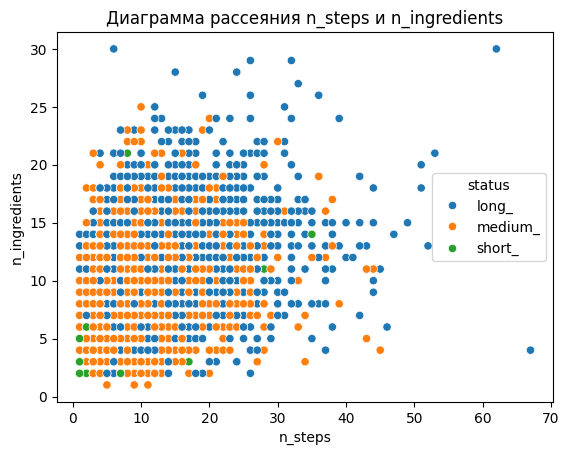

In [148]:
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='status').set(title="Диаграмма рассеяния n_steps и n_ingredients")

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [154]:
merge_data =  pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')


In [155]:
corr_values = merge_data[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

[Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')]

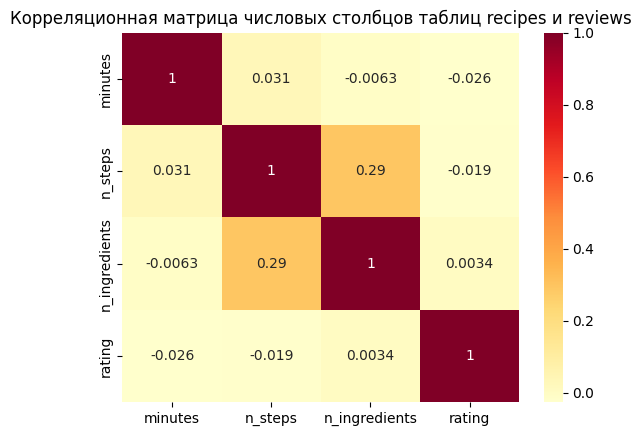

In [160]:
sns.heatmap(data=corr_values, cmap='YlOrRd', annot=True).set(title="Корреляционная матрица числовых столбцов таблиц recipes и reviews")